<a href="https://colab.research.google.com/github/huricane85/2024/blob/main/Vaastav_allgwdata_06_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vaastav/Fantasy-Premier-League

Cloning into 'Fantasy-Premier-League'...
remote: Enumerating objects: 357668, done.
remote: Counting objects: 100% (119532/119532), done.
remote: Compressing objects: 100% (14577/14577), done.
remote: Total 357668 (delta 106943), reused 111906 (delta 103914), pack-reused 238136 (from 1)
Receiving objects: 100% (357668/357668), 130.98 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (188723/188723), done.
Updating files: 100% (15763/15763), done.


In [2]:
import pandas as pd
import requests

In [3]:
allgws = pd.read_csv('/content/Fantasy-Premier-League/data/2024-25/gws/merged_gw.csv', on_bad_lines='skip')
allgws

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,...,1,0.0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,...,1,0.0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,...,2,0.0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,...,2,0.0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,...,1,16.0,1,0,0,0,55,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,Giovani Lo Celso,MID,Spurs,0.0,0,0,0,0,0.0,493,...,1,0.0,0,-35,0,35,49,True,0,13
8600,Tawanda Chirewa,MID,Wolves,0.0,0,0,0,0,0.0,538,...,2,0.0,0,-121,0,121,45,True,0,13
8601,Cameron Humphreys,MID,Ipswich,0.0,0,0,0,0,0.0,273,...,1,0.0,0,-66,0,66,45,False,0,13
8602,Ashley Young,DEF,Everton,3.8,0,0,-8,0,1.2,238,...,4,0.0,-1,45311,52901,7590,45,False,1,13


In [4]:
columns_list = allgws.columns.tolist()

# Print the list of columns
print("Columns of the DataFrame:")
for column in columns_list:
    print(column)


Columns of the DataFrame:
name
position
team
xP
assists
bonus
bps
clean_sheets
creativity
element
expected_assists
expected_goal_involvements
expected_goals
expected_goals_conceded
fixture
goals_conceded
goals_scored
ict_index
influence
kickoff_time
minutes
opponent_team
own_goals
penalties_missed
penalties_saved
red_cards
round
saves
selected
starts
team_a_score
team_h_score
threat
total_points
transfers_balance
transfers_in
transfers_out
value
was_home
yellow_cards
GW


In [5]:
import pandas as pd

# Assuming `allgws` is your DataFrame containing the "opponent_team" column
# Replace this with the name of your actual DataFrame

# Mapping of numbers to team names
team_names = {
    1: "Arsenal",
    2: "Aston Villa",
    3: "Bournemouth",
    4: "Brentford",
    5: "Brighton",
    6: "Chelsea",
    7: "Crystal Palace",
    8: "Everton",
    9: "Fulham",
    10: "Ipswich",
    11: "Ipswvich",
    12: "Liverpool",
    13: "Manchester City",
    14: "Manchester United",
    15: "Newcastle United",
    16: "Nottingham Forest",
    17: "Southampton",
    18: "Tottenham",
    19: "West Ham",
    20: "Wolverhampton Wanderers"
}

# Replace numbers with corresponding team names
allgws['opponent_team'] = allgws['opponent_team'].replace(team_names)

# Now all numbers in the "opponent_team" column have been replaced with the corresponding team names


In [6]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [7]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Group by the "name" column and calculate the sum of "expected_goals", "goals_scored", and the first value of "position" for each group
grouped_data = allgws.groupby('name').agg({'expected_goals': 'sum', 'goals_scored': 'sum', 'position': 'first'})

# Sort the grouped data by "expected_goals" in descending order and select the top 50 rows
top_50_Xg_for_season = grouped_data.nlargest(50, 'expected_goals')

# Reset index to make "name" a regular column
top_50_Xg_for_season.reset_index(inplace=True)

# Rename columns for clarity
top_50_Xg_for_season.rename(columns={'expected_goals': 'total_expected_goals', 'goals_scored': 'total_goals_scored', 'position': 'position'}, inplace=True)

# Display the new DataFrame
top_50_Xg_for_season


,name,total_expected_goals,total_goals_scored,position
0,Erling Haaland,11.99,12,FWD
1,Mohamed Salah,9.58,11,MID
2,Brennan Johnson,7.05,6,MID
3,Ollie Watkins,6.82,6,FWD
4,Nicolas Jackson,6.75,8,FWD
5,Cole Palmer,6.10,8,MID
6,Yoane Wissa,6.07,7,FWD
7,Dominic Solanke-Mitchell,5.57,4,FWD
8,Danny Welbeck,5.30,6,FWD
9,Chris Wood,5.24,9,FWD


In [8]:
from pandas import ExcelWriter

In [9]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Group by the "name" column and calculate the sum of "expected_assists", "assists", and the first value of "position" for each group
grouped_data = allgws.groupby('name').agg({'expected_assists': 'sum', 'assists': 'sum', 'position': 'first'})

# Sort the grouped data by "expected_assists" in descending order and select the top 50 rows
top_50_Xa_for_season = grouped_data.nlargest(50, 'expected_assists')

# Reset index to make "name" a regular column
top_50_Xa_for_season.reset_index(inplace=True)

# Rename columns for clarity
top_50_Xa_for_season.rename(columns={'expected_assists': 'total_expected_assists', 'assists': 'total_assists', 'position': 'position'}, inplace=True)

# Display the new DataFrame
top_50_Xa_for_season


,name,total_expected_assists,total_assists,position
0,Bukayo Saka,4.77,11,MID
1,Dwight McNeil,3.90,3,MID
2,James Maddison,3.74,4,MID
3,Alex Iwobi,3.16,3,MID
4,Trent Alexander-Arnold,3.03,1,DEF
5,Sávio 'Savinho' Moreira de Oliveira,2.94,3,MID
6,Bryan Mbeumo,2.87,1,MID
7,Youri Tielemans,2.85,4,MID
8,Phil Foden,2.83,1,MID
9,Leif Davis,2.78,2,DEF


In [10]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Find the highest value in the "GW" column
max_gw_value = allgws['GW'].max()

# Select the rows where "GW" is in the range of the highest value and the next four largest values
selected_rows = allgws[allgws['GW'].isin(range(max_gw_value, max_gw_value - 5, -1))]

# Group by the "name" column and calculate the sum of "expected_goals", "goals_scored", and the first value of "position" for each group
grouped_data = selected_rows.groupby('name').agg({'expected_goals': 'sum', 'goals_scored': 'sum', 'position': 'first'})

# Sort the grouped data by "expected_goals" in descending order and select the top 10 rows
Top10XgLast5gws = grouped_data.nlargest(10, 'expected_goals')

# Reset index to make "name" a regular column
Top10XgLast5gws.reset_index(inplace=True)

# Rename columns for clarity
Top10XgLast5gws.rename(columns={'expected_goals': 'total_expected_goals', 'goals_scored': 'total_goals_scored', 'position': 'position'}, inplace=True)

# Display the new DataFrame
Top10XgLast5gws


,name,total_expected_goals,total_goals_scored,position
0,Erling Haaland,5.60,2,FWD
1,Mohamed Salah,4.81,6,MID
2,Yoane Wissa,3.64,4,FWD
3,Justin Kluivert,3.15,4,MID
4,Brennan Johnson,3.07,3,MID
5,Ollie Watkins,2.85,1,FWD
6,Alexander Isak,2.76,3,FWD
7,Francisco Evanilson de Lima Barbosa,2.50,3,FWD
8,Liam Delap,2.18,2,FWD
9,Bruno Borges Fernandes,2.17,2,MID


In [11]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Find the highest value in the "GW" column
max_gw_value = allgws['GW'].max()

# Select the rows where "GW" is in the range of the highest value and the next four largest values
selected_rows = allgws[allgws['GW'].isin(range(max_gw_value, max_gw_value - 5, -1))]

# Group by the "name" column and calculate the sum of "expected_assists", "assists", and the first value of "position" for each group
grouped_data = selected_rows.groupby('name').agg({'expected_assists': 'sum', 'assists': 'sum', 'position': 'first'})

# Sort the grouped data by "expected_assists" in descending order and select the top 5 rows
top_10XaLast5gws = grouped_data.nlargest(10, 'expected_assists')

# Reset index to make "name" a regular column
top_10XaLast5gws.reset_index(inplace=True)

# Rename columns for clarity
top_10XaLast5gws.rename(columns={'expected_assists': 'total_expected_assists', 'assists': 'total_assists', 'position': 'position'}, inplace=True)

# Display the new DataFrame
top_10XaLast5gws


,name,total_expected_assists,total_assists,position
0,Phil Foden,1.75,0,MID
1,Bukayo Saka,1.62,4,MID
2,Ismaïla Sarr,1.43,1,MID
3,Alex Iwobi,1.42,2,MID
4,Dejan Kulusevski,1.21,2,MID
5,Son Heung-min,1.21,2,MID
6,Leif Davis,1.19,1,DEF
7,Mohamed Salah,1.16,2,MID
8,Lewis Hall,1.14,1,DEF
9,Sávio 'Savinho' Moreira de Oliveira,1.10,0,MID


In [12]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Filter the DataFrame to include only rows where the position is "GK"
gk_data = allgws[allgws['position'] == 'GK']

# Group by the "team" column and calculate the sum of "expected_goals_conceded" and "goals_conceded" for each group
grouped_data = gk_data.groupby('team').agg({'expected_goals_conceded': 'sum', 'goals_conceded': 'sum'})

# Sort the grouped data by "expected_goals_conceded" in descending order and select the top 20 rows
top_20_Xgc_for_GK = grouped_data.nlargest(20, 'expected_goals_conceded')

# Reset index to make "team" a regular column
top_20_Xgc_for_GK.reset_index(inplace=True)

# Rename columns for clarity
top_20_Xgc_for_GK.rename(columns={'expected_goals_conceded': 'total_expected_goals_conceded', 'goals_conceded': 'total_goals_conceded'}, inplace=True)

# Display the new DataFrame
top_20_Xgc_for_GK


,team,total_expected_goals_conceded,total_goals_conceded
0,Southampton,27.86,25
1,Ipswich,27.40,24
2,Leicester,25.70,27
3,Wolves,23.99,32
4,West Ham,23.74,24
5,Brentford,21.99,23
6,Brighton,21.26,17
7,Man Utd,19.36,13
8,Crystal Palace,19.32,18
9,Man City,19.18,19


In [13]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Find the highest value in the "GW" column
max_gw_value = allgws['GW'].max()

# Select the rows where "GW" is in the range of the last 5 game weeks
last_5_gws_data = allgws[allgws['GW'].isin(range(max_gw_value, max_gw_value - 5, -1))]

# Filter the DataFrame to include only rows where the position is "GK"
gk_data = last_5_gws_data[last_5_gws_data['position'] == 'GK']

# Group by the "team" column and calculate the sum of "expected_goals_conceded" and "goals_conceded" for each group
grouped_data = gk_data.groupby('team').agg({'expected_goals_conceded': 'sum', 'goals_conceded': 'sum'})

# Sort the grouped data by "expected_goals_conceded" in descending order and select the top 20 rows
top_20_Xgc_for_GK_last_5_gws = grouped_data.nlargest(20, 'expected_goals_conceded')

# Reset index to make "team" a regular column
top_20_Xgc_for_GK_last_5_gws.reset_index(inplace=True)

# Rename columns for clarity
top_20_Xgc_for_GK_last_5_gws.rename(columns={'expected_goals_conceded': 'total_expected_goals_conceded', 'goals_conceded': 'total_goals_conceded'}, inplace=True)

# Display the new DataFrame
top_20_Xgc_for_GK_last_5_gws


,team,total_expected_goals_conceded,total_goals_conceded
0,West Ham,10.69,9
1,Southampton,10.60,7
2,Man City,10.40,10
3,Ipswich,9.96,8
4,Wolves,8.80,9
5,Leicester,8.58,13
6,Spurs,7.95,5
7,Brighton,7.87,7
8,Aston Villa,7.64,12
9,Brentford,7.54,8


In [14]:
import pandas as pd

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Find the highest value in the "GW" column
max_gw_value = allgws['GW'].max()

# Select the rows where "GW" is in the range of the last 5 game weeks
last_5_gws_data = allgws[allgws['GW'].isin(range(max_gw_value, max_gw_value - 5, -1))]

# Filter the DataFrame to include only rows where the position is "GK"
gk_data = last_5_gws_data[last_5_gws_data['position'] == 'GK']

# Group by the "team" column and calculate the sum of "expected_goals_conceded" for each group
grouped_data = gk_data.groupby('team')['expected_goals_conceded'].sum()

# Sort the grouped data by "expected_goals_conceded" in descending order
sorted_grouped_data = grouped_data.sort_values(ascending=False)

# Display the total values as a table
print("Total Values for the Last 5 Game Weeks:")
total_table = pd.DataFrame(sorted_grouped_data)
total_table.columns = ['Sum of expected_goals_conceded']
total_table.index.name = 'Row Labels'
display(total_table)
print("\n")

# Now, let's display the rows with relevant game week data along with the opponent's team name
print("Individual Game Weeks with Opponent's Team Name:")
for index, row in last_5_gws_data.iterrows():
    print(f"Game Week {row['GW']}: Team {row['team']} - Opponent: {row['opponent_team']} | Expected Goals Conceded: {row['expected_goals_conceded']} | Goals Conceded: {row['goals_conceded']}")


Total Values for the Last 5 Game Weeks:


,Sum of expected_goals_conceded
Row Labels,
West Ham,10.69
Southampton,10.60
Man City,10.40
Ipswich,9.96
Wolves,8.80
Leicester,8.58
Spurs,7.95
Brighton,7.87
Aston Villa,7.64




Individual Game Weeks with Opponent's Team Name:
Game Week 9: Team Bournemouth - Opponent: Aston Villa | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Nott'm Forest - Opponent: Ipswvich | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Arsenal - Opponent: Liverpool | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Crystal Palace - Opponent: Tottenham | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Southampton - Opponent: Manchester City | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Aston Villa - Opponent: Bournemouth | Expected Goals Conceded: 0.31 | Goals Conceded: 1
Game Week 9: Team Crystal Palace - Opponent: Tottenham | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Spurs - Opponent: Crystal Palace | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Team Wolves - Opponent: Brighton | Expected Goals Conceded: 0.0 | Goals Conceded: 0
Game Week 9: Te

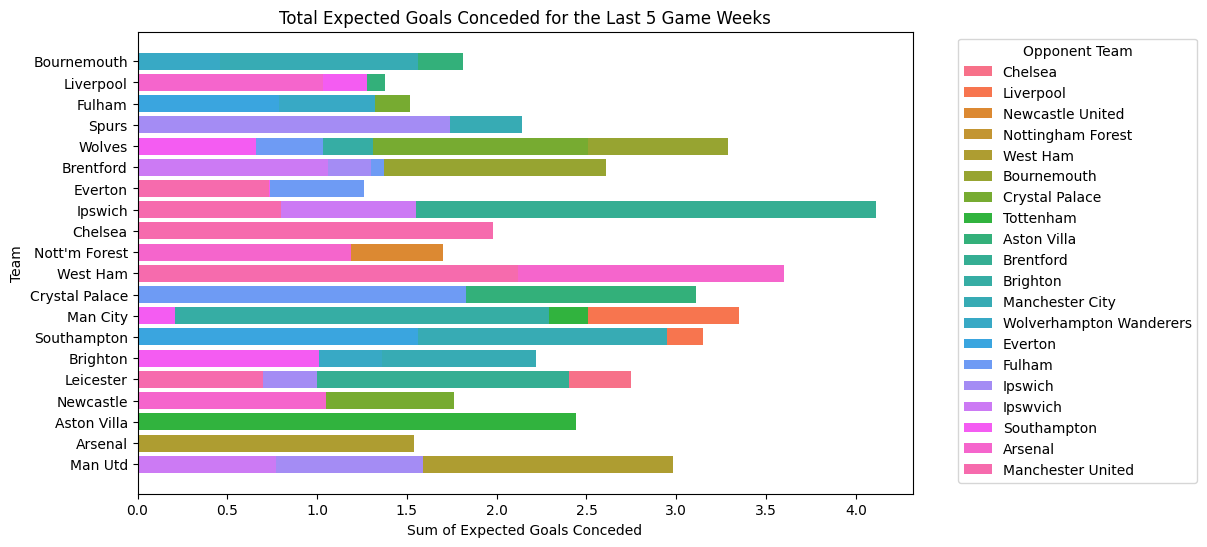

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `allgws` is your original DataFrame
# Replace this with the name of your actual DataFrame

# Find the highest value in the "GW" column
max_gw_value = allgws['GW'].max()

# Select the rows where "GW" is in the range of the last 5 game weeks
last_5_gws_data = allgws[allgws['GW'].isin(range(max_gw_value, max_gw_value - 5, -1))]

# Filter the DataFrame to include only rows where the position is "GK"
gk_data = last_5_gws_data[last_5_gws_data['position'] == 'GK']

# Group by the "team" column and calculate the sum of "expected_goals_conceded" for each group
grouped_data = gk_data.groupby(['team', 'opponent_team'])['expected_goals_conceded'].sum().reset_index()

# Define a color palette for opponent team names
palette = sns.color_palette('husl', len(grouped_data['opponent_team'].unique()))
color_map = dict(zip(grouped_data['opponent_team'].unique(), palette))

# Create a new column to map colors based on opponent team name
grouped_data['color'] = grouped_data['opponent_team'].map(color_map)

# Sort the data based on expected goals conceded
grouped_data = grouped_data.sort_values(by='expected_goals_conceded', ascending=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Plot bars with different colors for each opponent team
for opponent, color in color_map.items():
    team_data = grouped_data[grouped_data['opponent_team'] == opponent]
    plt.barh(y=team_data['team'],
             width=team_data['expected_goals_conceded'],
             color=color,
             label=opponent)

# Set labels and title
plt.xlabel('Sum of Expected Goals Conceded')
plt.ylabel('Team')
plt.title('Total Expected Goals Conceded for the Last 5 Game Weeks')

# Add legend
plt.legend(title='Opponent Team', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [16]:
import pandas as pd

# Assuming 'allgws' is your DataFrame
# Grouping the total points by opponent_team and summing them up
grouped = allgws.groupby('opponent_team')['total_points'].sum()

# Sorting the grouped data
sorted_points = grouped.sort_values(ascending=True)

# Displaying the sorted result
print(sorted_points)


opponent_team
Liverpool                  348
Chelsea                    408
Tottenham                  424
Brighton                   438
Arsenal                    449
Nottingham Forest          460
Manchester City            493
Fulham                     503
Newcastle United           510
Brentford                  516
Manchester United          520
Bournemouth                528
Aston Villa                556
Ipswvich                   567
West Ham                   585
Wolverhampton Wanderers    586
Crystal Palace             607
Ipswich                    624
Everton                    666
Southampton                670
Name: total_points, dtype: int64


In [17]:
import pandas as pd

# Assuming 'allgws' is your DataFrame
# Find the highest value in the "GW" column
highest_gw = allgws['GW'].max()

# Select rows where the "GW" column is in the top five highest values
selected_rows = allgws[allgws['GW'].isin(range(highest_gw, highest_gw - 5, -1))]

# Grouping the total points by opponent_team and summing them up for the selected rows
grouped = selected_rows.groupby('opponent_team')['total_points'].sum()

# Sorting the grouped data
sorted_points = grouped.sort_values(ascending=True)

# Displaying the sorted result
print(sorted_points)


opponent_team
Liverpool                  137
Manchester United          138
Chelsea                    140
Wolverhampton Wanderers    167
Tottenham                  167
Brighton                   169
Bournemouth                177
Arsenal                    180
Brentford                  188
Fulham                     191
Nottingham Forest          191
Newcastle United           198
Crystal Palace             202
Ipswich                    213
Southampton                239
West Ham                   247
Ipswvich                   259
Manchester City            274
Everton                    274
Aston Villa                277
Name: total_points, dtype: int64


In [18]:
import pandas as pd

# Assuming 'allgws' is your DataFrame
# Selecting the top 20 values for "total_points"
top_20 = allgws.nlargest(20, 'total_points')

# Keeping only necessary columns - 'name', 'position', 'opponent_team', and 'total_points'
top_20 = top_20[['name', 'position', 'opponent_team', 'total_points']]

# Displaying the top 20 values
top_20


,name,position,opponent_team,total_points
3224,Cole Palmer,MID,Brighton,25
8353,Kevin Schade,MID,Ipswvich,23
712,Noni Madueke,MID,Wolverhampton Wanderers,20
8371,Justin Kluivert,MID,Wolverhampton Wanderers,20
4485,Michail Antonio,FWD,Ipswich,18
8220,Bukayo Saka,MID,West Ham,18
629,Cole Palmer,MID,Wolverhampton Wanderers,17
851,Erling Haaland,FWD,Ipswich,17
1387,Mohamed Salah,MID,Manchester United,17
1484,Erling Haaland,FWD,West Ham,17


In [19]:
import pandas as pd

# Assuming 'allgws' is your DataFrame

# Grouping by 'GW' and finding the row with the highest 'total_points' in each group
highest_per_gw = allgws.loc[allgws.groupby('GW')['total_points'].idxmax()]

# Selecting only necessary columns - 'GW', 'name', 'position', 'opponent_team', and 'total_points'
highest_per_gw = highest_per_gw[['GW', 'name', 'position', 'opponent_team', 'total_points']]

# Displaying the resulting table
highest_per_gw


,GW,name,position,opponent_team,total_points
140,1,Mohamed Salah,MID,Ipswich,14
712,2,Noni Madueke,MID,Wolverhampton Wanderers,20
1387,3,Mohamed Salah,MID,Manchester United,17
2102,4,Robert Sánchez,GK,Bournemouth,15
2706,5,Nicolas Jackson,FWD,West Ham,16
3224,6,Cole Palmer,MID,Brighton,25
4485,7,Michail Antonio,FWD,Ipswich,18
4814,8,Michael Keane,DEF,Ipswich,14
5742,9,Bryan Mbeumo,MID,Ipswich,15
6144,10,Dominic Solanke-Mitchell,FWD,Aston Villa,16
